# Problemas de Estadística Descriptiva

## Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


In [2]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode

# Cargar dataset de IMDb
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [3]:
df["title_length"] = df["title"].str.len()
print(df[["title", "title_length"]].head())

                      title  title_length
0  The Shawshank Redemption            24
1             The Godfather            13
2    The Godfather: Part II            22
3           The Dark Knight            15
4              Pulp Fiction            12


In [4]:
from scipy.stats import mode

media = df["title_length"].mean()
mediana = df["title_length"].median()
moda = mode(df["title_length"], keepdims=True).mode[0]

print(f"Media: {media:.2f}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda}")

Media: 15.48
Mediana: 14.0
Moda: 12


In [5]:
rango = df["title_length"].max() - df["title_length"].min()
varianza = df["title_length"].var()
desviacion_std = df["title_length"].std()

print(f"Rango: {rango}")
print(f"Varianza: {varianza:.2f}")
print(f"Desviación estándar: {desviacion_std:.2f}")

Rango: 67
Varianza: 72.11
Desviación estándar: 8.49


In [6]:
from scipy.stats import skew, kurtosis

asimetria = skew(df["title_length"], bias=False)
curtosis_valor = kurtosis(df["title_length"], bias=False)

print(f"Asimetría: {asimetria:.4f}")
print(f"Curtosis: {curtosis_valor:.4f}")

Asimetría: 1.5253
Curtosis: 3.8123


In [7]:
idx_min = df["title_length"].idxmin()
idx_max = df["title_length"].idxmax()

titulo_mas_corto = df.loc[idx_min, "title"]
titulo_mas_largo = df.loc[idx_max, "title"]

print(f"Título más corto: '{titulo_mas_corto}' (longitud: {df.loc[idx_min, 'title_length']})")
print(f"Título más largo: '{titulo_mas_largo}' (longitud: {df.loc[idx_max, 'title_length']})")

Título más corto: 'M' (longitud: 1)
Título más largo: 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb' (longitud: 68)


/tmp/ipykernel_3779/2262124704.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


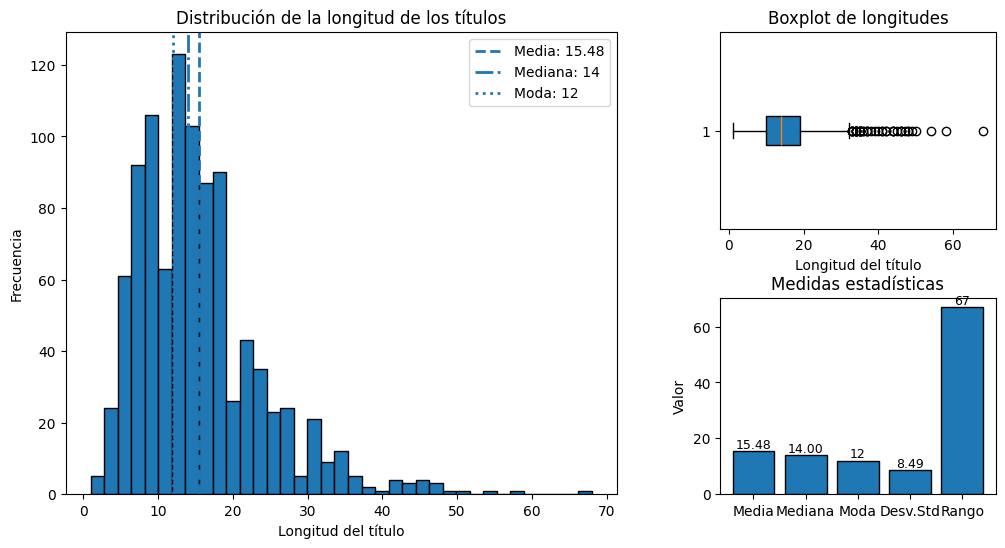

In [8]:
import matplotlib.pyplot as plt

if "title_length" not in df.columns:
    df["title_length"] = df["title"].fillna("").str.len()

x = df["title_length"].dropna()


media   = x.mean()
mediana = x.median()
moda    = x.mode().iloc[0]
rango   = x.max() - x.min()
var_    = x.var()          
std_    = x.std()          

fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(2, 2, width_ratios=[2, 1], height_ratios=[1, 1], wspace=0.25, hspace=0.35)

ax_hist = fig.add_subplot(gs[:, 0])
ax_hist.hist(x, bins='auto', edgecolor='black')
ax_hist.set_title("Distribución de la longitud de los títulos")
ax_hist.set_xlabel("Longitud del título")
ax_hist.set_ylabel("Frecuencia")

ax_hist.axvline(media,   linestyle='--', linewidth=2, label=f"Media: {media:.2f}")
ax_hist.axvline(mediana, linestyle='-.', linewidth=2, label=f"Mediana: {mediana:.0f}")
ax_hist.axvline(moda,    linestyle=':',  linewidth=2, label=f"Moda: {moda:.0f}")
ax_hist.legend()

ax_box = fig.add_subplot(gs[0, 1])
ax_box.boxplot(x, vert=False, patch_artist=True)
ax_box.set_title("Boxplot de longitudes")
ax_box.set_xlabel("Longitud del título")

ax_bar = fig.add_subplot(gs[1, 1])
labels = ["Media", "Mediana", "Moda", "Desv.Std", "Rango"]
values = [media, mediana, moda, std_, rango]
ax_bar.bar(labels, values, edgecolor='black')
ax_bar.set_title("Medidas estadísticas")
ax_bar.set_ylabel("Valor")
for i, v in enumerate(values):
    ax_bar.text(i, v, f"{v:.2f}" if isinstance(v, float) else f"{int(v)}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

---

## Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


In [9]:
valores = df["title_length"].dropna().sample(5, random_state=42).tolist()
print(valores)

[22, 19, 7, 15, 19]


In [10]:
import numpy as np
media = np.mean(valores)
print(f"Media: {media:.2f}")

Media: 16.40


In [11]:
import numpy as np

valores = np.array([10, 13, 14, 18, 22])
media = valores.mean()
diferencias_cuadrado = (valores - media) ** 2
print(diferencias_cuadrado.tolist())

[29.160000000000004, 5.760000000000002, 1.960000000000001, 6.759999999999998, 43.559999999999995]


In [12]:
import math
desviacion = math.sqrt(varianza)
print(f"Desviación estándar: {desviacion:.2f}")

Desviación estándar: 8.49
